In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pmdarima.arima import auto_arima

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import timedelta



In [5]:

df = pd.read_csv('Telkom.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3750.0,3790.0,3690.0,3770.0,3249.883301,272812700
1,2019-01-08,3770.0,3860.0,3730.0,3850.0,3318.845947,478130500
2,2019-01-15,3860.0,4050.0,3850.0,4030.0,3474.012939,460955700
3,2019-01-22,4000.0,4010.0,3730.0,3780.0,3258.503418,531602600
4,2019-01-29,3780.0,3930.0,3780.0,3780.0,3258.503418,464647400
...,...,...,...,...,...,...,...
174,2022-05-03,4560.0,4560.0,4300.0,4310.0,4157.917480,343682000
175,2022-05-10,4120.0,4480.0,4120.0,4260.0,4109.681641,860249400
176,2022-05-17,4250.0,4290.0,4070.0,4110.0,3964.974609,807191200
177,2022-05-24,4120.0,4340.0,4120.0,4250.0,4100.034668,612416700


In [6]:
df = df[['Date','Close']]
df

,Date,Close
0,2019-01-01,3770.0
1,2019-01-08,3850.0
2,2019-01-15,4030.0
3,2019-01-22,3780.0
4,2019-01-29,3780.0
...,...,...
174,2022-05-03,4310.0
175,2022-05-10,4260.0
176,2022-05-17,4110.0
177,2022-05-24,4250.0


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True) 
df['Close']=df['Close'].astype(float)
df

,Close
Date,
2019-01-01,3770.0
2019-01-08,3850.0
2019-01-15,4030.0
2019-01-22,3780.0
2019-01-29,3780.0
...,...
2022-05-03,4310.0
2022-05-10,4260.0
2022-05-17,4110.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2019-01-01 to 2022-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   179 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


<AxesSubplot:xlabel='Date'>

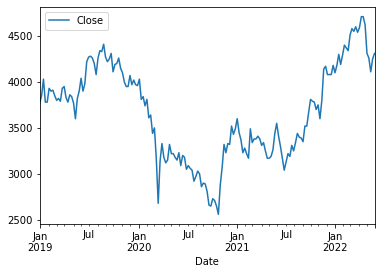

In [8]:
df.info()
df.plot()


In [9]:
print(df.shape)
train=df.iloc[:len(df)-35]
test=df.iloc[len(df)-35:]
print(train.shape,test.shape)


(179, 1)
(144, 1) (35, 1)


In [10]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,144.0,3529.027778,452.227308,2560.0,3187.5,3440.0,3902.5,4410.0


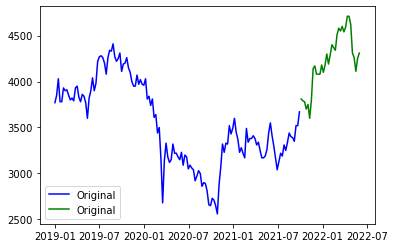

In [11]:
plt.plot(train, color = 'blue', label = 'Original')
plt.plot(test, color = 'green', label = 'Original')
plt.legend(loc = 'best')
plt.show()


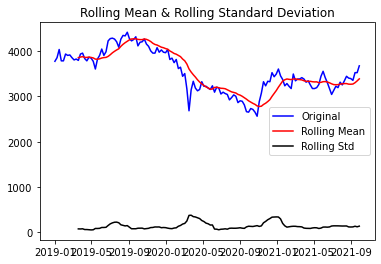

In [12]:
rolling_mean = train.rolling(window = 12).mean()
rolling_std = train.rolling(window = 12).std()
plt.plot(train, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

<Figure size 432x288 with 0 Axes>

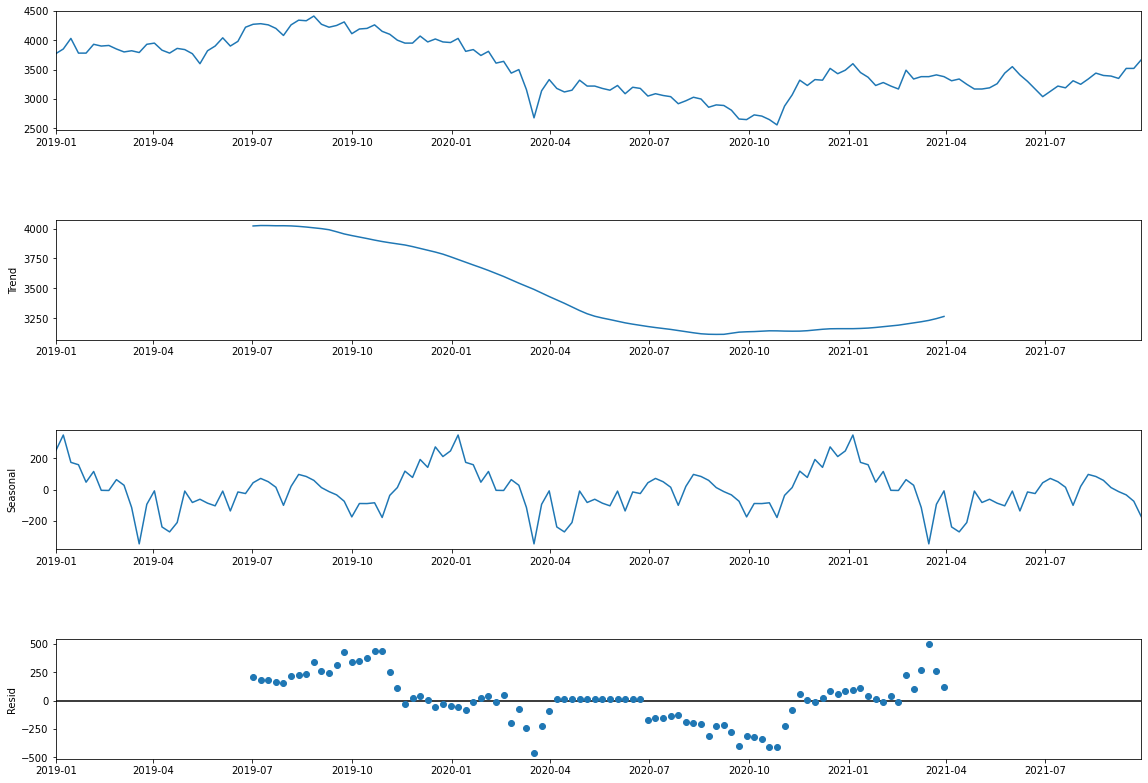

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train, model='addictive')

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(18, 12)

In [14]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(train['Close'])

In [15]:
#tes stasioner

print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.6900026688005318
p-value: 0.43627062416212903
Critical Values:
	1%: -3.4769274060112707
	5%: -2.8819726324025625
	10%: -2.577665408088415


In [16]:
train['1diff'] = train['Close'] - train['Close'].shift(1)

In [17]:
result=adfuller(train['1diff'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -12.811409163767113
p-value: 6.434680627287829e-24
Critical Values:
	1%: -3.477261624048995
	5%: -2.8821181874544233
	10%: -2.5777431104939494


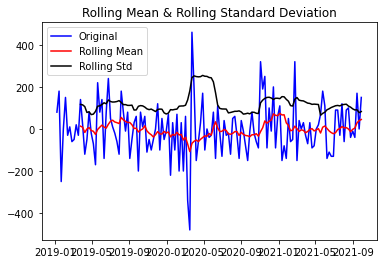

In [18]:
rolling_mean = train['1diff'].rolling(window = 12).mean()
rolling_std = train['1diff'].rolling(window = 12).std()
plt.plot(train['1diff'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

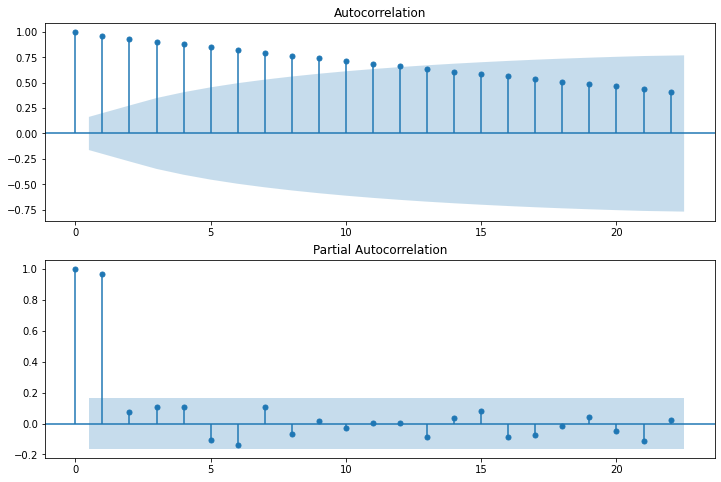

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#acf & pacf sebelum differencing
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train.Close, ax=ax1, )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train.Close, ax=ax2, )

In [20]:
from statsmodels.tsa.stattools import acf
print(acf(train['Close']))

[ 1.          0.96031199  0.92697956  0.90097919  0.88108958  0.85316304
  0.81798888  0.79310338  0.76647355  0.7410455   0.712037    0.68621872
  0.66280427  0.63388634  0.60889621  0.58895963  0.56603183  0.53794467
  0.51039721  0.49055623  0.46821704  0.43844592  0.41129207  0.38658528
  0.36237629  0.33075181  0.30685504  0.28362448  0.25138246  0.21043972
  0.17360568  0.14528785  0.11582723  0.0795734   0.03892088  0.00850825
 -0.0148712  -0.04186111 -0.06504888 -0.08144586 -0.09794195]


In [21]:
from statsmodels.tsa.stattools import pacf
print(pacf(train['Close']))

[ 1.          0.96702746  0.07544964  0.10441516  0.10499973 -0.10792502
 -0.13823472  0.10929629 -0.06631476  0.01363031 -0.02763888  0.00576808
  0.00366768 -0.08881152  0.03760424  0.08381892 -0.08858517 -0.07323202
 -0.01262118  0.04310602 -0.04836152 -0.11378585  0.02312595 -0.03808422
 -0.05546193 -0.0969467   0.11353791 -0.05984475 -0.21561852 -0.21281255
 -0.03095986 -0.00919767  0.00116088 -0.09784022 -0.19982114  0.00777659
  0.11049765 -0.01676988  0.09825077  0.12021114 -0.04356758]


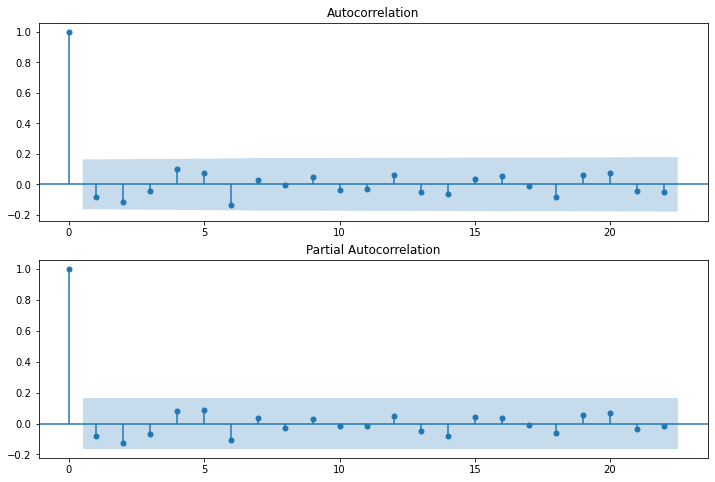

In [22]:
#acf & pacf sebelum differencing
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['1diff'].dropna(), ax=ax1, )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['1diff'].dropna(), ax=ax2, )

In [23]:
from statsmodels.tsa.stattools import acf
print(acf(train['1diff'].dropna()))

[ 1.         -0.08212401 -0.11507786 -0.04225957  0.10213625  0.07757527
 -0.13356243  0.02777031 -0.00375491  0.04812174 -0.03639476 -0.03018012
  0.06211065 -0.04798345 -0.06136787  0.03604329  0.05160965 -0.01377912
 -0.08613961  0.06202964  0.07745167 -0.04168836 -0.04721514  0.00331392
  0.08221738 -0.12492526 -0.01873781  0.11424017  0.11717889 -0.04737939
 -0.095854   -0.0141101   0.09970275  0.05492176 -0.14621426 -0.07383862
  0.04336767 -0.05807328 -0.10462798  0.02948624  0.05516307]


In [24]:
from statsmodels.tsa.stattools import pacf
print(pacf(train['1diff'].dropna()))

[ 1.         -0.08270235 -0.12440071 -0.06576695  0.08221016  0.08828706
 -0.10757977  0.03537536 -0.02760807  0.03051304 -0.01731932 -0.01743296
  0.04688249 -0.05050828 -0.077882    0.04375028  0.03293877 -0.0076217
 -0.05997503  0.05241176  0.06522557 -0.03240947 -0.01846356  0.00225926
  0.04421969 -0.14328662 -0.00353831  0.12730552  0.14069564 -0.00604047
 -0.04532278 -0.0958718   0.06546469  0.10360858 -0.11838948 -0.1322612
 -0.03318761 -0.13141893 -0.14599538  0.02357239  0.06696123]


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
base_model = SARIMAX(train['1diff'], order=(0,1,1)).fit()
display(base_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  1diff   No. Observations:                  144
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -898.212
Date:                Mon, 30 Jan 2023   AIC                           1800.423
Time:                        10:50:09   BIC                           1806.349
Sample:                    01-01-2019   HQIC                          1802.831
                         - 09-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9978      0.176     -5.661      0.000      -1.343      -0.652
sigma2      1.582e+04   3046.936      5.192      0.000    9848.245    2.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):                26.44
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             0.15
Prob(H) (two-sided):                  0.34   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

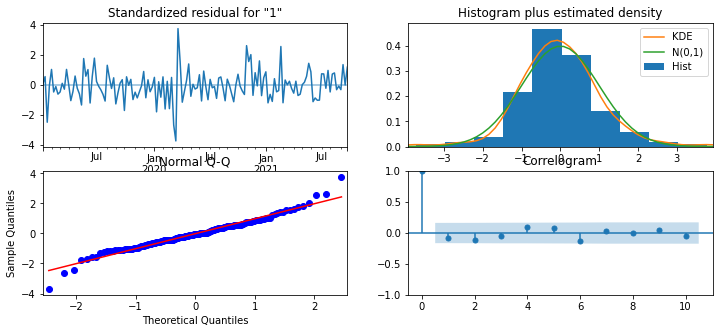

In [37]:
base_model.plot_diagnostics(figsize=(12,5))
plt.show()

In [27]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Close'],order=(0,1,1))
model=model.fit()

<AxesSubplot:xlabel='Date'>

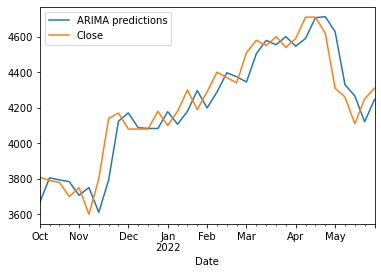

In [28]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Close'].plot(legend=True)


In [29]:
start=len(train)
end=len(train)+len(test)-1
forecast = model.predict(start = start,  

                          end = end + 30 , 

                          typ = 'levels').rename('Forecast') 

In [30]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Close'], pred)
print('MAE: %f' % mae)

MAE: 92.751206


In [31]:
from sklearn.metrics import mean_absolute_percentage_error
mae = mean_absolute_percentage_error(test['Close'], pred)
print('MAPE: %f' % mae)

MAPE: 0.022194


In [32]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(test['Close'],pred)
mape


92.75120564571675

2021-10-05    3665.141562
2021-10-12    3805.272607
2021-10-19    3793.803479
2021-10-26    3783.725213
2021-11-02    3707.450246
                 ...     
2022-11-29    4384.333547
2022-12-06    4387.323389
2022-12-13    4390.313230
2022-12-20    4393.303072
2022-12-27    4396.292914
Freq: W-TUE, Name: Forecast, Length: 65, dtype: float64

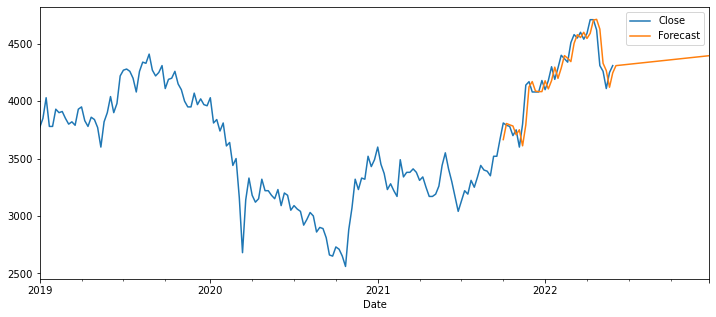

In [33]:
df['Close'].plot(figsize = (12, 5), legend = True) 

forecast.plot(legend = True)


forecast

In [34]:
pred

2021-10-05    3665.141562
2021-10-12    3805.272607
2021-10-19    3793.803479
2021-10-26    3783.725213
2021-11-02    3707.450246
2021-11-09    3750.723032
2021-11-16    3611.019509
2021-11-23    3792.922034
2021-11-30    4124.499499
2021-12-07    4170.565833
2021-12-14    4087.814675
2021-12-21    4083.406163
2021-12-28    4083.171303
2022-01-04    4177.831359
2022-01-11    4107.136255
2022-01-18    4179.108075
2022-01-25    4296.549406
2022-02-01    4198.666189
2022-02-08    4288.124095
2022-02-15    4397.029729
2022-02-22    4374.429832
2022-03-01    4344.824068
2022-03-08    4504.190206
2022-03-15    4578.951126
2022-03-22    4554.532193
2022-03-29    4600.567575
2022-04-05    4546.216538
2022-04-12    4590.657308
2022-04-19    4706.631941
2022-04-26    4712.810411
2022-05-03    4627.934253
2022-05-10    4329.927573
2022-05-17    4266.715186
2022-05-24    4121.338737
2022-05-31    4246.135500
Freq: W-TUE, Name: ARIMA predictions, dtype: float64

In [35]:
forecast

2021-10-05    3665.141562
2021-10-12    3805.272607
2021-10-19    3793.803479
2021-10-26    3783.725213
2021-11-02    3707.450246
                 ...     
2022-11-29    4384.333547
2022-12-06    4387.323389
2022-12-13    4390.313230
2022-12-20    4393.303072
2022-12-27    4396.292914
Freq: W-TUE, Name: Forecast, Length: 65, dtype: float64

In [40]:
train

,Close,1diff
Date,,
2019-01-01,3770.0,NaN
2019-01-08,3850.0,80.0
2019-01-15,4030.0,180.0
2019-01-22,3780.0,-250.0
2019-01-29,3780.0,0.0
...,...,...
2021-08-31,3390.0,-10.0
2021-09-07,3350.0,-40.0
2021-09-14,3520.0,170.0
